# Binary Classification - Booking cancellation dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y

In [6]:
X = df.drop(columns=['id', 'booking_status'])
Y = df[['booking_status']]

In [7]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [9]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

### Create a preprocesing pipeline for X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Create a train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [16]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [17]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [18]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [19]:
xtrain.shape

(33680, 17)

In [20]:
xtest.shape

(8420, 17)

### Create a neural network

### Dropout layer
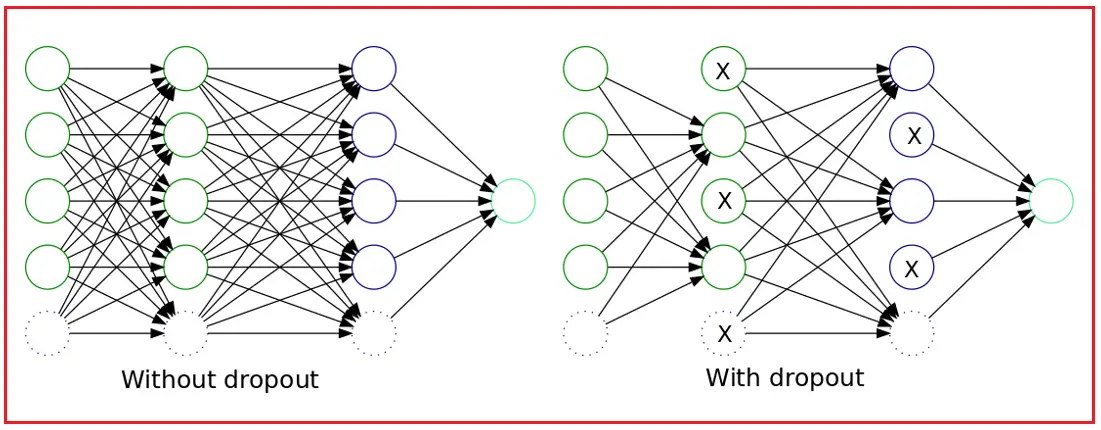

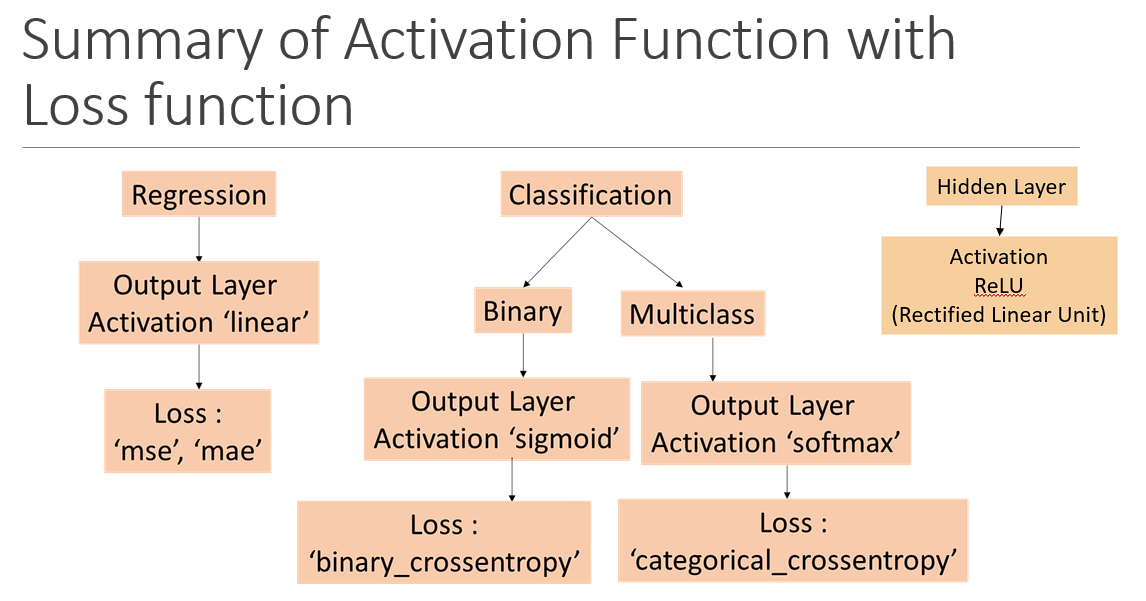

In [21]:
xtrain.shape[1]

17

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [23]:
# Initialize the model
model = Sequential()

# Create a hidden layer 1 with dropout
model.add(Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.4))
# Create a hidden layer 2 with dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# Create an output layer
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the neural network

In [25]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60


842/842 [==============================] - 3s 2ms/step - loss: 0.5334 - accuracy: 0.7329 - val_loss: 0.4784 - val_accuracy: 0.7752
Epoch 2/60
842/842 [==============================] - 1s 2ms/step - loss: 0.4834 - accuracy: 0.7702 - val_loss: 0.4722 - val_accuracy: 0.7773
Epoch 3/60
842/842 [==============================] - 1s 2ms/step - loss: 0.4777 - accuracy: 0.7753 - val_loss: 0.4697 - val_accuracy: 0.7789
Epoch 4/60
842/842 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7794 - val_loss: 0.4665 - val_accuracy: 0.7825
Epoch 5/60
842/842 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7814 - val_loss: 0.4686 - val_accuracy: 0.7833
Epoch 6/60
842/842 [==============================] - 1s 2ms/step - loss: 0.4669 - accuracy: 0.7847 - val_loss: 0.4639 - val_accuracy: 0.7868
Epoch 7/60
842/842 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.7855 - val_loss: 0.4616 - val_accuracy: 0.7893
Epoc

### Plot the learning curve

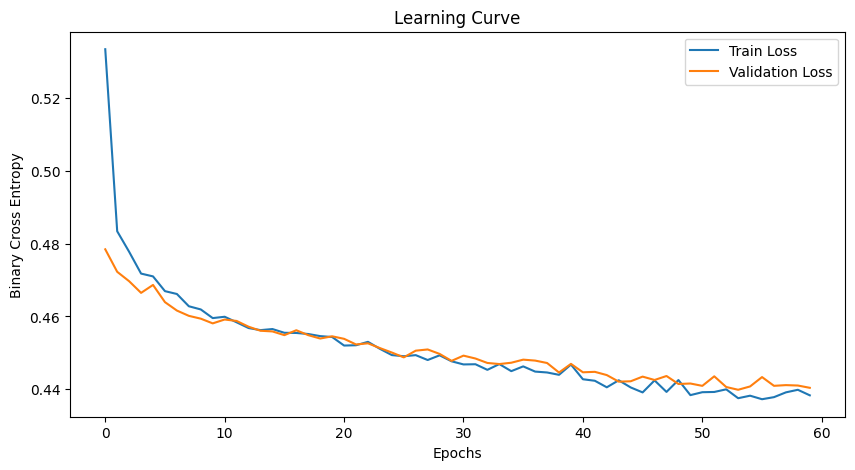

In [28]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [29]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.4208 - accuracy: 0.8113


[0.42081791162490845, 0.8113123774528503]

In [30]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.8078


[0.4281889796257019, 0.807838499546051]

### Predict the results for train and test

In [31]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 0s 1ms/step


In [32]:
yprob_tr[0:5]

array([[0.00533781],
       [0.1561987 ],
       [0.8147309 ],
       [0.81996757],
       [0.81247073]], dtype=float32)

In [33]:
yprob_ts[0:5]

array([[0.04585219],
       [0.9173927 ],
       [0.3729166 ],
       [0.03067624],
       [0.23507534]], dtype=float32)

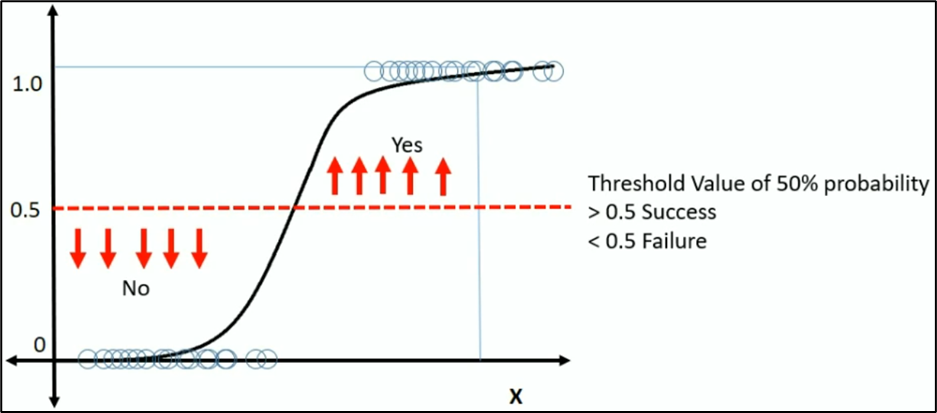

In [34]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]

In [35]:
ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [36]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [37]:
ypred_ts[0:5]

[0, 1, 0, 0, 0]

In [38]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


### Create a confusion matrix for test data

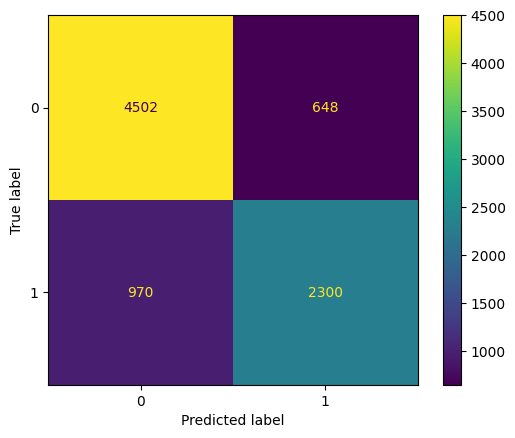

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### print the classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      5150
           1       0.78      0.70      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.81      8420



### Above model is good as i get accuray of 81% 

### Predicting out of sample data

In [41]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [42]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

### apply pre.transform on xnew

In [45]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [47]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


### Predictions for above data

In [48]:
prob = model.predict(xnew_pre)
prob[0:5]

878/878 [==============================] - 1s 1ms/step


array([[0.0675843 ],
       [0.06244727],
       [0.4443215 ],
       [0.2055676 ],
       [0.48050484]], dtype=float32)

In [49]:
preds = [1 if i>=0.5 else 0 for i in prob]
preds[0:5]

[0, 0, 0, 0, 0]

### Save above in dataframe

In [50]:
df_final = xnew[['id']]
df_final.head()

,id
0,42100
1,42101
2,42102
3,42103
4,42104


In [51]:
df_final['booking_status_pred']=preds
df_final['Prob'] = prob

In [52]:
df_final

,id,booking_status_pred,Prob
0,42100,0,0.067584
1,42101,0,0.062447
2,42102,0,0.444322
3,42103,0,0.205568
4,42104,0,0.480505
...,...,...,...
28063,70163,1,0.961284
28064,70164,0,0.065664
28065,70165,0,0.165687
28066,70166,0,0.419457


In [53]:
df_final['booking_status_pred'].value_counts()

booking_status_pred
0    18296
1     9772
Name: count, dtype: int64

### Save above data to results.csv

In [54]:
df_final.to_csv('Results.csv', index=False)